In [1]:
# Load original dataset
import pandas as pd

file_path = '../../data/lm3.csv'
data_df = pd.read_csv(file_path)
print('Num of features: %s' % len(data_df.columns.values))
data_df.head()

Num of features: 79


,Label,Outer left eyebrow-x,Outer left eyebrow-y,Outer left eyebrow-z,Middle left eyebrow-x,Middle left eyebrow-y,Middle left eyebrow-z,Inner left eyebrow-x,Inner left eyebrow-y,Inner left eyebrow-z,...,Lower lip outer middle-z,Chin middle-x,Chin middle-y,Chin middle-z,Left ear lobe-x,Left ear lobe-y,Left ear lobe-z,Right ear lobe-x,Right ear lobe-y,Right ear lobe-z
0,ANGER,-72.961,-1.725,22.958,-55.678,4.591,38.791,-31.920,-1.929,36.645,...,39.421,-9.840,-112.234,31.313,NaN,NaN,NaN,NaN,NaN,NaN
1,DISGUST,-76.565,-0.458,6.126,-62.086,9.454,24.055,-35.614,2.066,25.073,...,24.378,-13.583,-109.568,19.583,NaN,NaN,NaN,NaN,NaN,NaN
2,FEAR,-76.163,6.390,10.784,-57.083,16.865,30.162,-33.708,14.082,32.408,...,42.100,-13.020,-110.107,33.429,NaN,NaN,NaN,NaN,NaN,NaN
3,HAPPY,-72.140,8.896,9.353,-54.721,22.380,27.474,-29.789,15.802,28.937,...,38.018,-9.030,-97.687,36.058,NaN,NaN,NaN,NaN,NaN,NaN
4,SADNESS,-73.743,3.099,12.438,-58.607,15.144,29.381,-32.979,11.594,30.048,...,41.452,-10.731,-100.452,35.956,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
def variety(lbl):
    return [lbl+'-x', lbl+'-y', lbl+'-z']

# Drop features where 'NaN' is present
data_df = data_df.drop(variety('Right nose peak') + variety('Left nose peak') + \
                       variety('Left temple') + variety('Left temple') + variety('Chin middle'))
data_df = data_df.dropna(axis=1, how='any')
print('Num of features: %s' % len(data_df.columns.values))
data_df.head()

ValueError: labels ['Right nose peak-x' 'Right nose peak-y' 'Right nose peak-z'
 'Left nose peak-x' 'Left nose peak-y' 'Left nose peak-z' 'Left temple-x'
 'Left temple-y' 'Left temple-z' 'Left temple-x' 'Left temple-y'
 'Left temple-z' 'Chin middle-x' 'Chin middle-y' 'Chin middle-z'] not contained in axis

In [16]:
# Compute the distance from all points to the nose tip (intuition: nose tip position is likely to be similar regardless of emotion)
import math
from constants import get_all_landmarks

def get_euclidean_distance(x1, x2, y1, y2, z1, z2):
    '''
    Return the euclidean distance between two points
    '''
    term_1 = x1 - x2
    term_2 = y1 - y2
    term_3 = z1 - z2
    return math.sqrt(term_1 ** 2 + term_2 ** 2 + term_3 ** 2)

# Create new dataset using distance from each landmark to the nose tip as features
all_landmarks = get_all_landmarks()
valid_landmarks = []

# Remove landmarks which were previously removed due to undefined values ('NaN')
columns = data_df.columns.values
for landmark in all_landmarks:
    if landmark + '-x' in columns and landmark + '-y' in columns and landmark + '-z' in columns:
        valid_landmarks.append(landmark)
        
# Create dictionary to temporarily hold distance values
d = {}
for landmark in valid_landmarks:
    d[landmark + '-distance'] = []
    
# For each feature, compute distance from nose tip
for _, row in data_df.iterrows():
    for landmark in valid_landmarks:
        nose_x, nose_y, nose_z = (row['Nose tip-x'], row['Nose tip-y'], row['Nose tip-z'])
        landmark_x, landmark_y, landmark_z = (row[landmark + '-x'], row[landmark + '-y'], row[landmark + '-z'])
        distance = get_euclidean_distance(landmark_x, nose_x, landmark_y, nose_y, landmark_z, nose_z)
        d[landmark + '-distance'].append(distance)

In [17]:
# Create new dataframe (with distance from each feature to nose tip)
new_df = pd.concat([data_df[['Label']], pd.DataFrame.from_dict(d)], axis = 1)
new_df.head()

,Label,Inner left eye corner-distance,Inner left eyebrow-distance,Inner right eye corner-distance,Inner right eyebrow-distance,Left mouth corner-distance,Left nose peak-distance,Lower lip outer middle-distance,Middle left eyebrow-distance,Middle right eyebrow-distance,Nose saddle left-distance,Nose saddle right-distance,Nose tip-distance,Outer left eye corner-distance,Outer left eyebrow-distance,Outer right eye corner-distance,Outer right eyebrow-distance,Right mouth corner-distance,Right nose peak-distance,Upper lip outer middle-distance
0,ANGER,48.320893,52.302733,46.445306,49.323696,49.710507,28.965077,47.027712,68.604555,62.403460,30.010462,31.389805,0.0,69.056291,82.751964,69.686552,77.457973,50.377337,29.400754,37.257397
1,DISGUST,49.676002,56.297807,47.923506,53.636198,60.168264,27.436390,47.237504,75.618506,68.595138,34.210765,32.859958,0.0,69.800333,86.974470,69.653552,80.602320,61.014204,27.659199,30.427472
2,FEAR,51.721834,55.412569,47.899946,52.126447,59.278691,29.614247,56.691828,70.193833,65.250849,34.601826,32.275820,0.0,69.292339,87.016438,69.986870,83.150397,59.718072,36.237937,32.909250
3,HAPPY,50.123712,56.339942,48.696039,55.593275,59.423615,27.808884,46.997084,74.337650,72.985060,31.161426,30.150812,0.0,71.752651,87.714131,71.318389,90.340048,62.375068,27.099267,29.701697
4,SADNESS,47.775040,54.819732,46.514515,51.802259,56.603095,28.924049,46.792953,71.457392,63.548657,29.565180,29.111703,0.0,70.203170,84.063570,67.659181,80.334043,56.767108,35.701921,35.393646


In [18]:
features = [x != 'Label' for x in new_df.columns.values]

# Separating out the features
values = new_df.loc[:, features].values

# Separating out the label
labels = new_df.loc[:,['Label']].values

In [19]:
# Scale values (mean = 0 and variance = 1)
from sklearn.preprocessing import normalize

values =  normalize(values, axis=0)

In [20]:
# Use PCA to reduce dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(values)
principal_df = pd.DataFrame(data = principal_components, columns = ['PCA 1', 'PCA 2', 'PCA 3'])
principal_df.head()

,PCA 1,PCA 2,PCA 3
0,0.021365,0.003338,-0.000933
1,0.013124,0.001929,-0.004081
2,0.008810,0.008937,0.005111
3,0.013511,0.004906,-0.009057
4,0.017228,0.007826,0.000711


In [21]:
# Add the label to the dataframe with the principal components
principal_labels_df = pd.concat([new_df[['Label']], principal_df], axis = 1)
principal_labels_df.head()

,Label,PCA 1,PCA 2,PCA 3
0,ANGER,0.021365,0.003338,-0.000933
1,DISGUST,0.013124,0.001929,-0.004081
2,FEAR,0.008810,0.008937,0.005111
3,HAPPY,0.013511,0.004906,-0.009057
4,SADNESS,0.017228,0.007826,0.000711


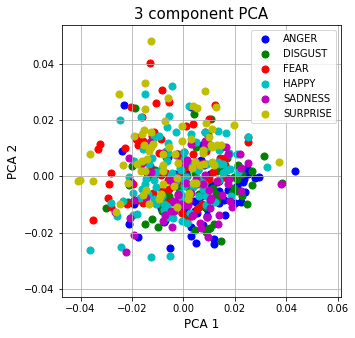

In [22]:
# Visualize the PCA 2d projection
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 12)
ax.set_ylabel('PCA 2', fontsize = 12)
ax.set_title('3 component PCA', fontsize = 15)

targets = ['ANGER', 'DISGUST', 'FEAR', 'HAPPY', 'SADNESS', 'SURPRISE']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for target, color in zip(targets, colors):
    indexes_to_keep = principal_labels_df['Label'] == target
    ax.scatter(
        principal_labels_df.loc[indexes_to_keep, 'PCA 1'],
        principal_labels_df.loc[indexes_to_keep, 'PCA 2'],
        c = color,
        s = 50
    )
ax.legend(targets)
ax.grid()
plt.show()

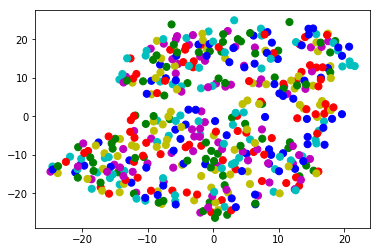

In [23]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_trans = tsne.fit_transform(values)
plt.scatter(X_trans[:,0], X_trans[:,1], c=colors, s=50)
plt.show()